<h1>Microbiome Analysis for Peri-Implant Inflammation</h1>

Microbiome Analysis for Peri-Implant Inflammation is a data-driven research project focused on investigating the microbial composition around patients with peri-implant inflammation. Peri-implant inflammation is a common condition affecting dental implants, and understanding the underlying microbial communities can provide crucial insights into its development and progression.

The project aims to utilize advanced data analysis techniques to uncover the microbial diversity and relative abundance within the oral microbiome of patients experiencing peri-implant inflammation. By studying the taxonomic classifications at various levels such as Domain, Phylum, Class, Order, Family, Genus, and Species, the project seeks to identify potential microbial signatures associated with inflammation.

<b>Objective</b>
1. Identify potential microbial indicators associated with peri-implant inflammation.
2. Develop predictive models to assess the likelihood of inflammation based on microbiome data.


<h1>Data</h2>

The data provided for the project is all about the tiny living organisms (microorganisms) that exist in and around dental implants. These microorganisms are classified into different categories like "Domain," "Phylum," "Class," and more. Each category tells us more about these microorganisms, like what group they belong to and how many of them are present.

We'll use special computer tools to study this data. First, we'll group the microorganisms that are similar to each other. Then, we'll compare the groups of microorganisms in implants with inflammation to the ones without inflammation. This will help us see if there are any differences between them.

In [1]:
# Define the project goal
project_goal = "To study the microbial compositions around implants and understand their correlation with peri-implant inflammation."
print("Project Goal:", project_goal)


Project Goal: To study the microbial compositions around implants and understand their correlation with peri-implant inflammation.


<h3>Relevant Libraries</h3>

In [26]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
# read the csv to df
df = pd.read_csv("./Data/Bacteria.csv")

In [4]:
# display data
df.head(7)

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV,SUM,...,pm14,pm15,pm2,pm3,pm4,pm5,pm6,pm7,P15,pm9
0,d__Bacteria,k__norank_d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Neisseriaceae,g__Neisseria,s__unclassified_g__Neisseria,ASV88,68307,...,2402,3137,2195,2377,1377,1789,1631,2390,2801,2730
1,d__Bacteria,k__norank_d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Neisseriaceae,g__Neisseria,s__Neisseria_perflava,ASV124,31297,...,807,993,1102,1141,629,625,459,844,902,842
2,d__Bacteria,k__norank_d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__unclassified_g__Streptococcus,ASV7,49662,...,485,793,1257,1270,745,740,816,905,768,792
3,d__Bacteria,k__norank_d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__unclassified_g__Streptococcus,ASV3,80121,...,632,1069,881,942,602,520,669,834,730,711
4,d__Bacteria,k__norank_d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Carnobacteriaceae,g__Granulicatella,s__unclassified_g__Granulicatella,ASV2,42972,...,494,717,519,712,427,381,483,604,539,588
5,d__Bacteria,k__norank_d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,f__Campylobacteraceae,g__Campylobacter,s__unclassified_g__Campylobacter,ASV128,7355,...,232,219,431,405,347,326,181,432,437,515
6,d__Bacteria,k__norank_d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__unclassified_g__Haemophilus,ASV43,28695,...,304,446,800,733,364,505,416,492,814,466


* Domain, Kingdom, Phylum, Class, Order, Family, Genus, Species:
>These columns represent the taxonomic hierarchy of microorganisms, indicating their classification from broad to specific levels.
They provide insights into the biological relationships and categorization of different microorganisms.

* ASV (Amplified Sequence Variant):
>This column holds unique identifiers for individual microorganisms or microbial sequences.
Each ASV corresponds to a specific microbial entity or taxon.

* SUM (Total Abundance):
>This column represents the total abundance of microorganisms in a sample.
It indicates the overall microbial load present in a specific sample.

* Percent:
>This column indicates the relative abundance of microorganisms.
It is a normalized value that represents the proportion of a specific microorganism in relation to the total microbial community in a sample.

* pm8, p14, C3, C4, C5, C6, C7, P1, P10, ... P15, pm9:

>These columns represent the abundance values of specific microorganisms or microbial groups in a sample.
Each column corresponds to a different microorganism or group, identified by its unique label (e.g., pm8, p14, P1).
Abundance values indicate the quantity or presence of the corresponding microorganism in the sample.

In [5]:
# Check for outliers using summary statistics
df.describe()


,SUM,Percent,pm8,p14,C3,C4,C5,C6,C7,P1,...,pm14,pm15,pm2,pm3,pm4,pm5,pm6,pm7,P15,pm9
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,...,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,598.291402,0.000577,11.705136,12.060012,11.624351,11.327178,11.321985,12.061743,11.597230,10.615695,...,7.301212,9.377957,11.818811,13.335257,7.594922,7.493364,8.660127,9.000000,10.761685,8.517600
std,3689.345258,0.003558,79.603065,146.150516,81.668012,143.899105,112.414397,130.820462,131.973121,129.724477,...,70.114789,93.928968,81.126491,85.166229,51.041201,57.913585,57.986385,75.184984,86.551439,80.028491
min,2.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80121.000000,0.077274,1965.000000,4893.000000,1856.000000,4960.000000,3197.000000,3514.000000,4348.000000,3924.000000,...,2402.000000,3137.000000,2195.000000,2377.000000,1377.000000,1789.000000,1631.000000,2390.000000,2801.000000,2730.000000


* Microbial Abundance Distribution:

>The 'SUM' column indicates the total microbial abundance in each sample.
The 'Percent' column represents the relative abundance of microorganisms, which is a normalized value.

* Abundance Variation:

>The microbial abundance values vary widely, as seen from the difference between the minimum and maximum values across columns.
There are many zero values (e.g., 'pm8', 'C3', 'C4') indicating the absence of certain microorganisms in some samples.

* Dominant Microorganisms:

>Certain samples have higher microbial abundances ('SUM') compared to others, potentially indicating dominant microorganisms in those samples.

<h2>Data Processing</h2>

In [6]:
# check for inconsistencies in categorical columns
categorical_cols = ['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family','Genus', 'Species','ASV','SUM']
inconsistent_categories = df[categorical_cols].apply(lambda col: col.nunique())
print("\nVectors per Feature:")
print(inconsistent_categories)


Vectors per Feature:
Domain        1
Kingdom       1
Phylum       19
Class        31
Order        76
Family      119
Genus       218
Species     433
ASV        1733
SUM         506
dtype: int64


* <b>Label Assignment</b>

In [8]:
# extract the microbial abundance data (columns ASV to pm9)
abundance_data =df.iloc[:, 9:-1]

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(abundance_data)

# apply K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/home/milo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# add target to data
df["Target"] = clusters

* <b>Columns to drop</b>

>Species: This column seems specific to individual species and might not provide much general information about the microbiome composition.

>ASV: Similar to the 'Species' column, this seems to be specific to the microbial sequences and might not contribute to the overall analysis.

>SUM: The 'SUM' column appears to be a cumulative sum, which might not directly impact the analysis.

>Percent: Assuming this represents the percentage of a certain microbial component, it could be highly correlated with other columns, making it redundant.

In [10]:
# drop irrelevant columns
columns_to_drop = ['Species', 'ASV', 'SUM', 'Percent']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

* <b>Scaling Numerical Features</b>

>Scaling numerical features helps bring them to the same scale, preventing some features from dominating the analysis due to their larger magnitude. This ensures that each feature contributes equally to the analysis.



In [11]:
# initialize MinMaxScaler
scaler = MinMaxScaler()

# select numerical columns for normalization using iloc
numerical_columns = df_cleaned.columns[7:-1]

# apply Min-Max normalization to the selected numerical columns
normalized_data = df_cleaned.copy()
normalized_data[numerical_columns] = scaler.fit_transform(normalized_data[numerical_columns])


<b>Encoding Categorical Variables</b>

Categorical variables like 'Domain', 'Kingdom', 'Phylum', etc., need to be encoded into numerical format for machine learning algorithms to process. This ensures that these categories are represented as distinct numerical values rather than arbitrary labels.

In [12]:
# handling categorical features
cat_columns=['Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family','Genus']
data_encoded = pd.get_dummies(df_cleaned, cat_columns)

<h2>EDA</h2>

* <b>Correlation</b>

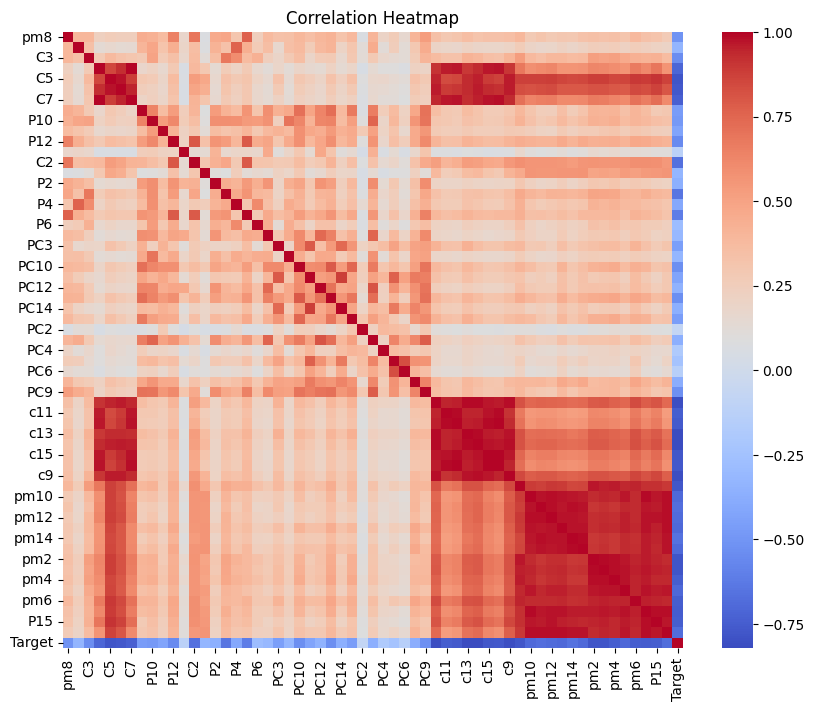

In [27]:
# correlation matrix heatmap
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

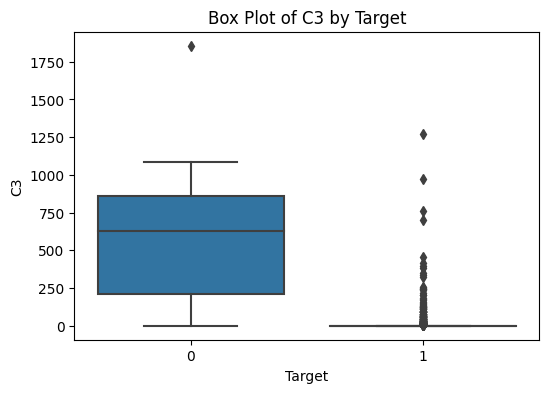

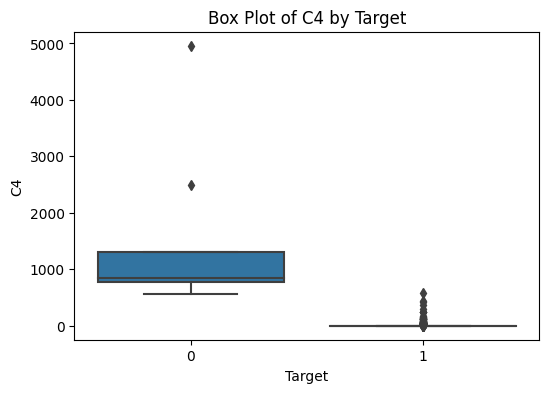

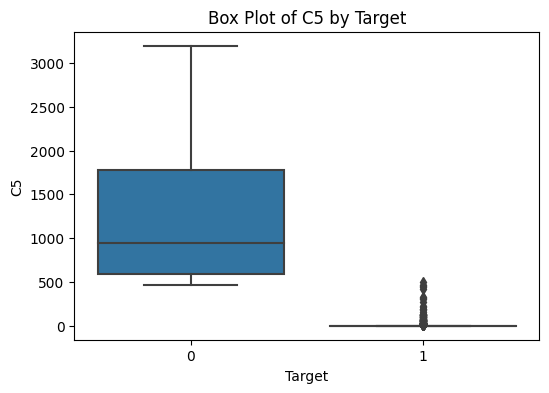

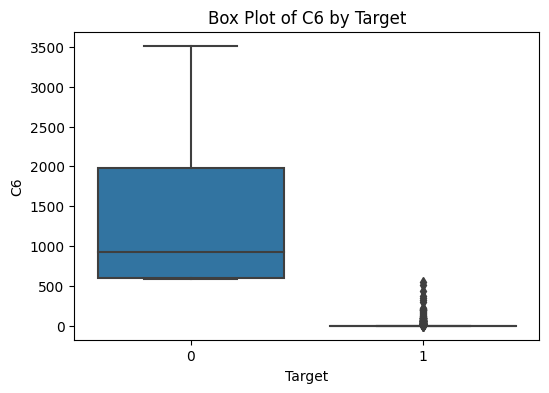

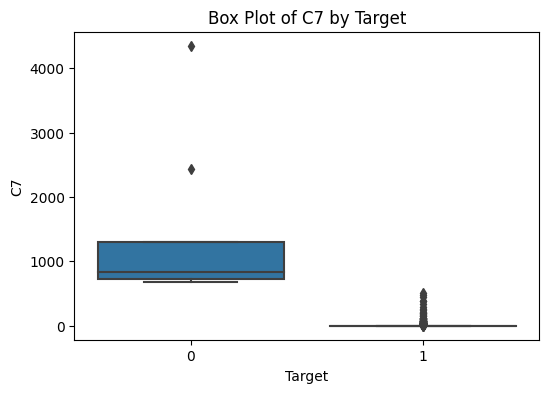

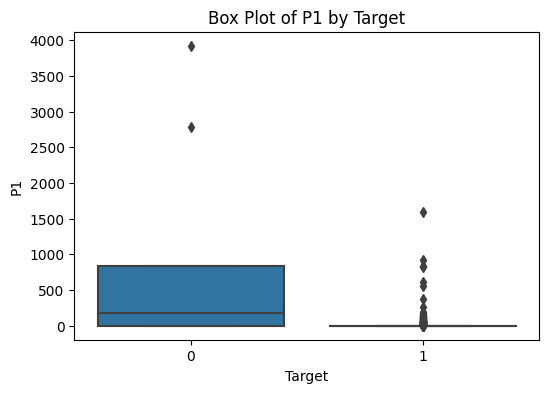

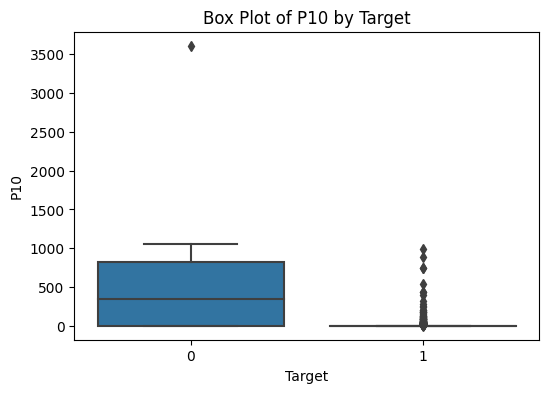

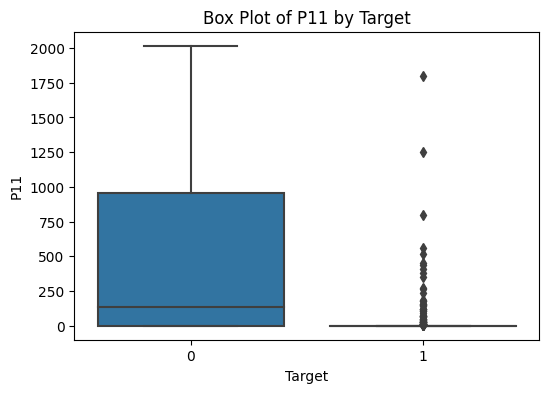

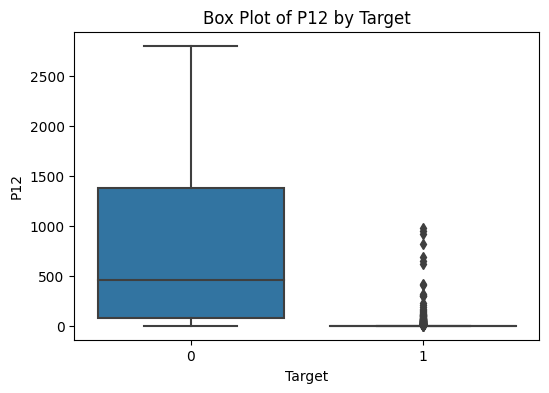

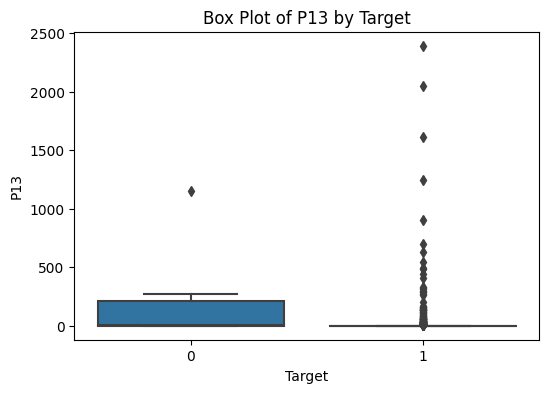

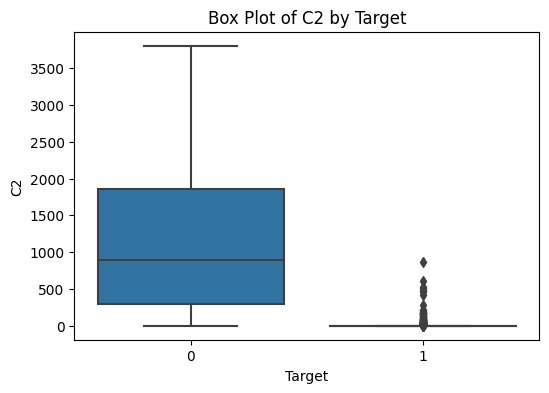

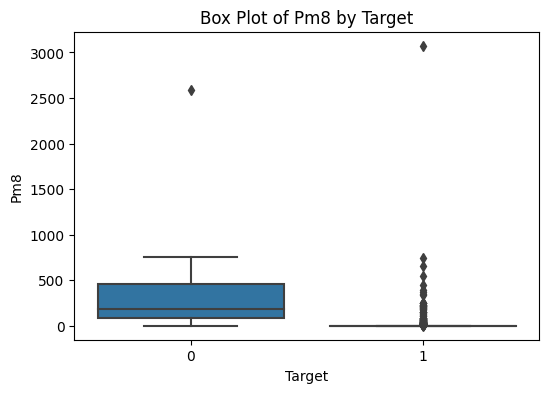

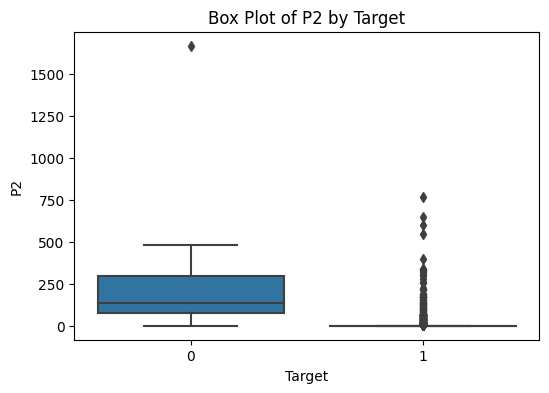

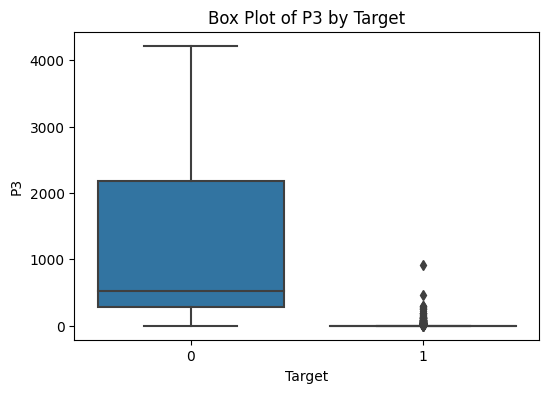

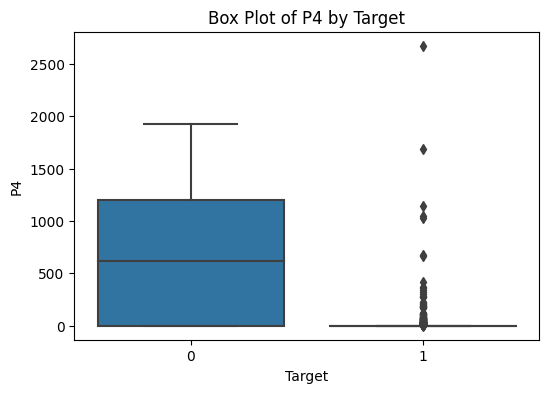

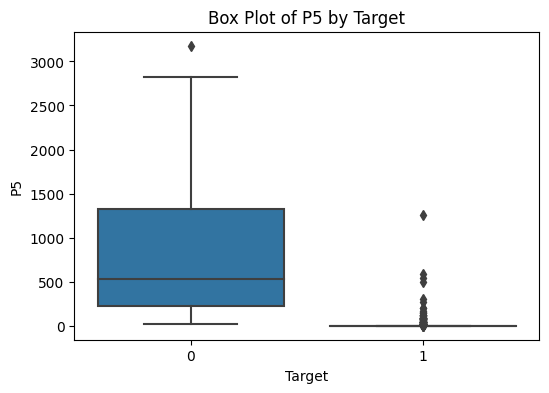

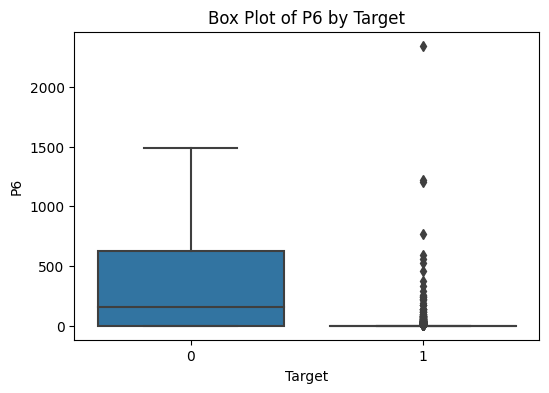

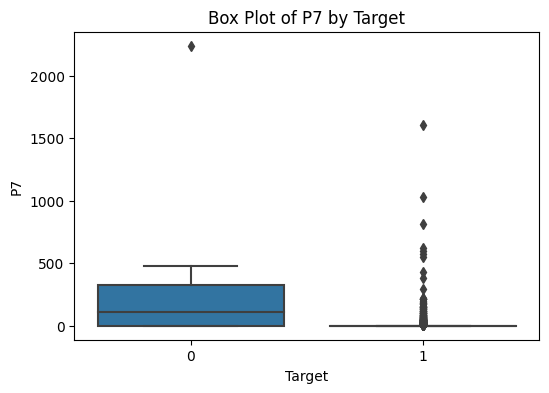

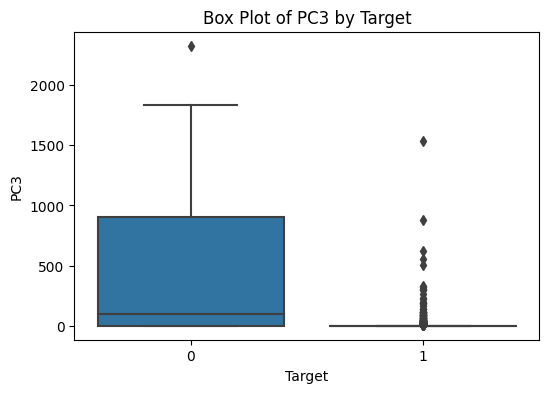

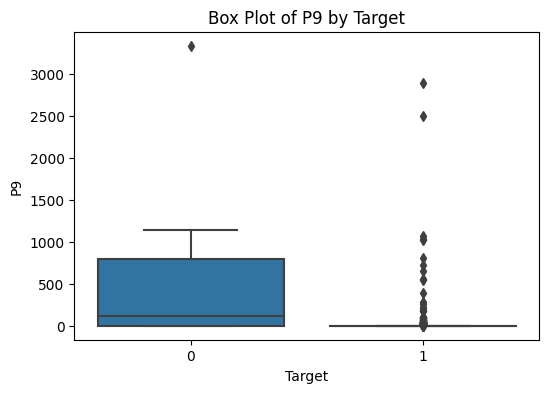

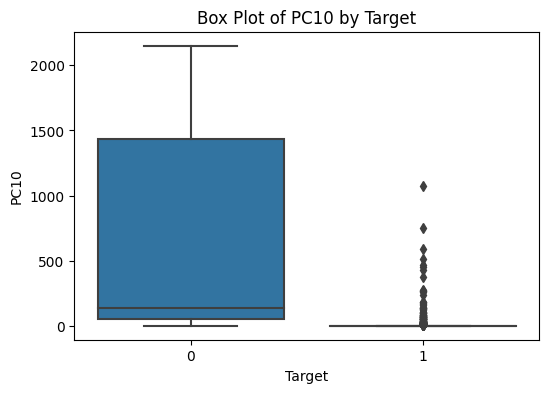

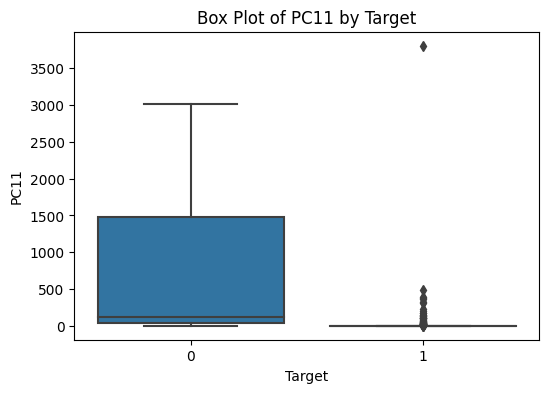

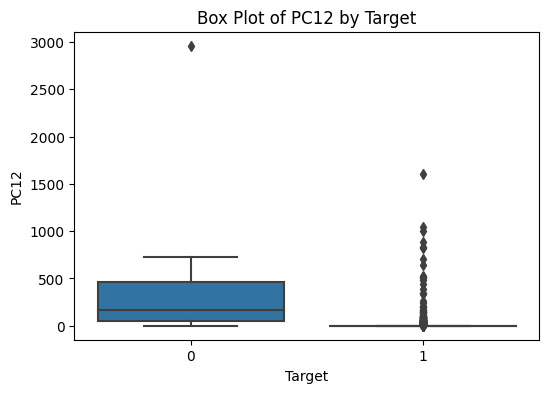

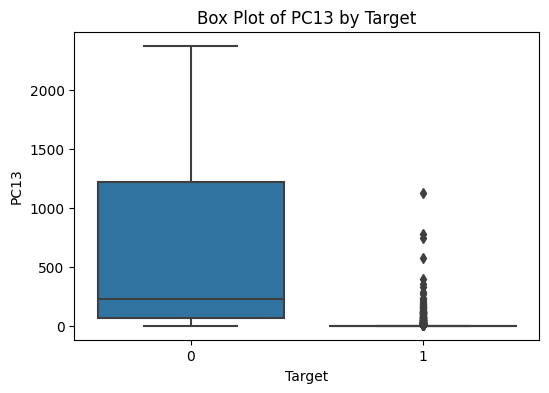

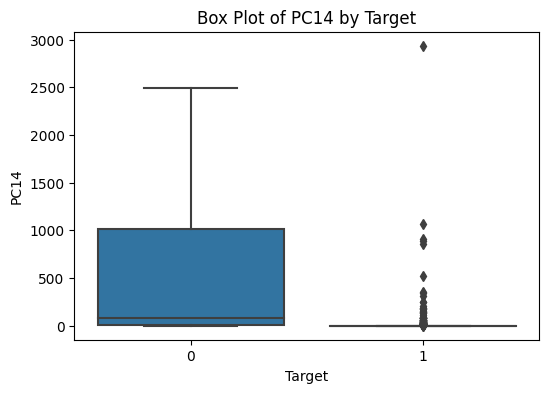

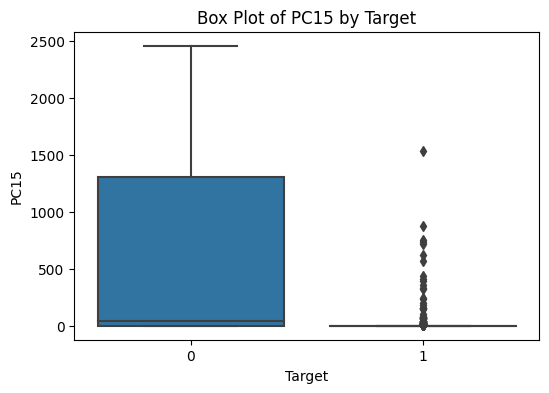

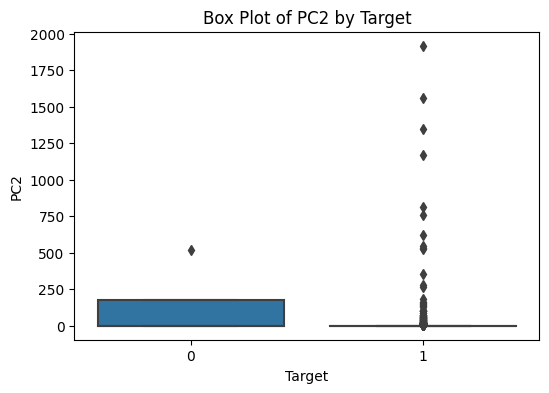

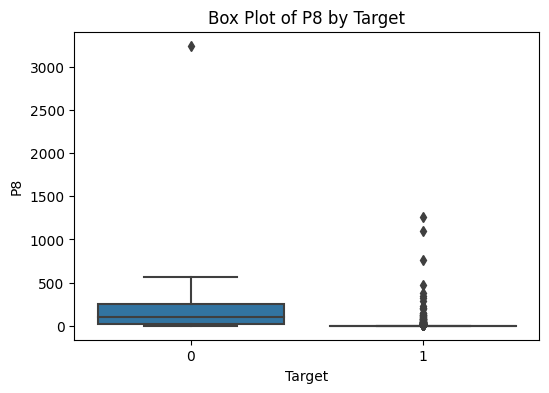

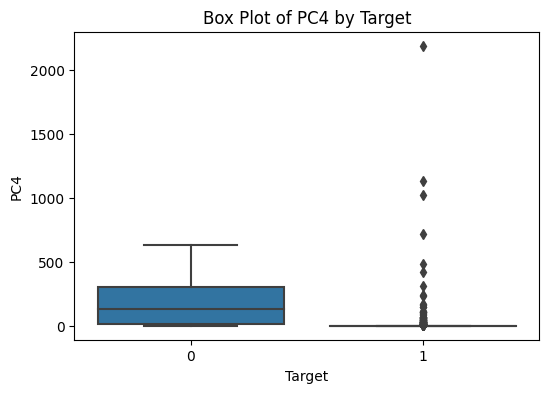

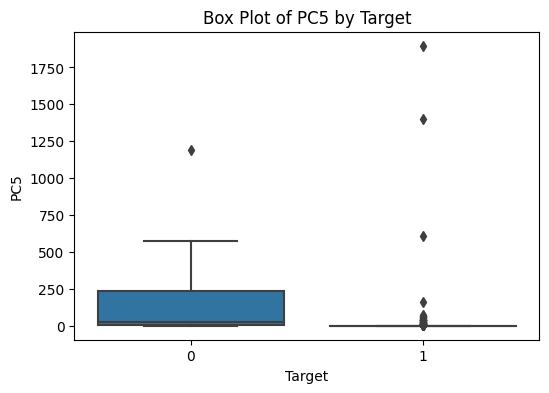

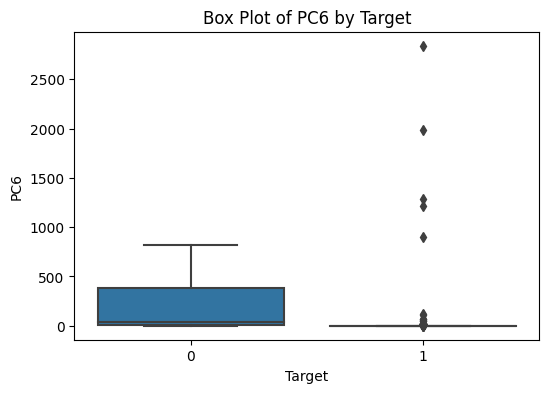

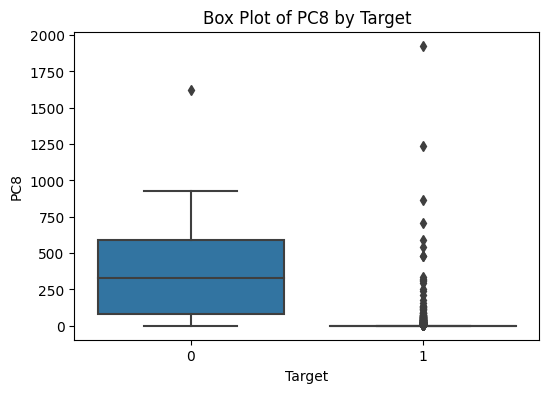

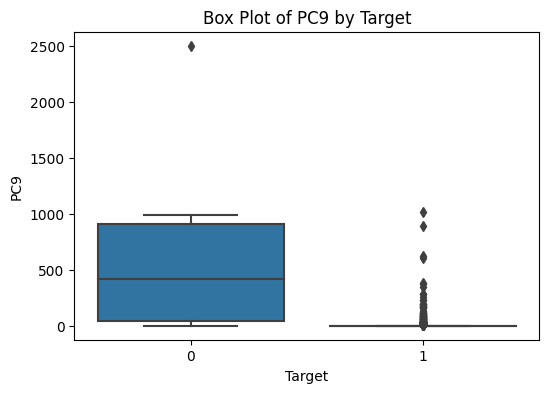

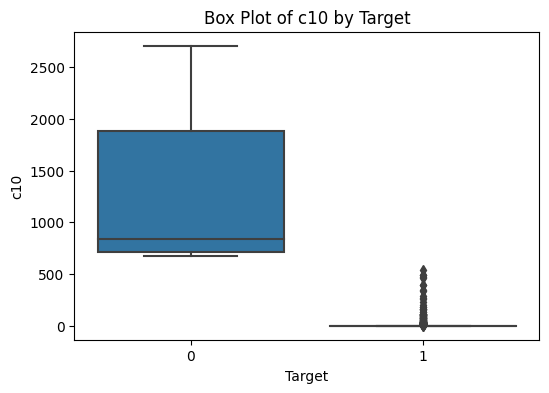

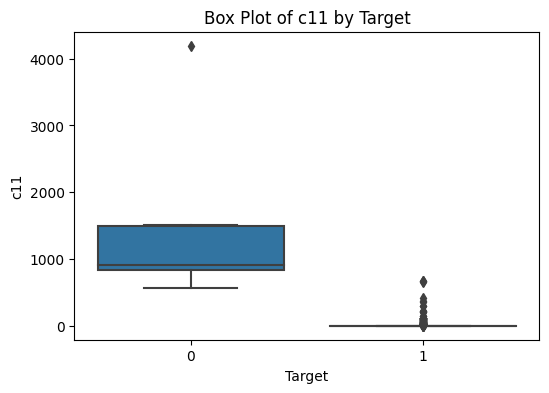

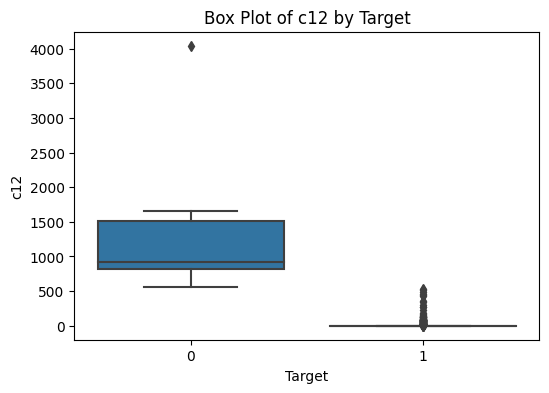

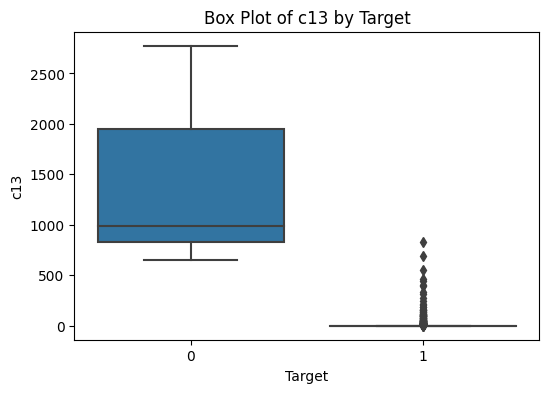

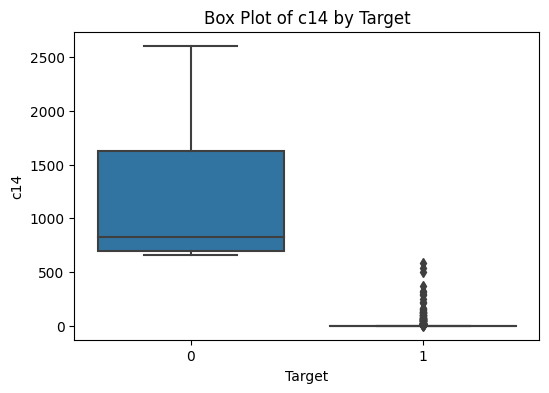

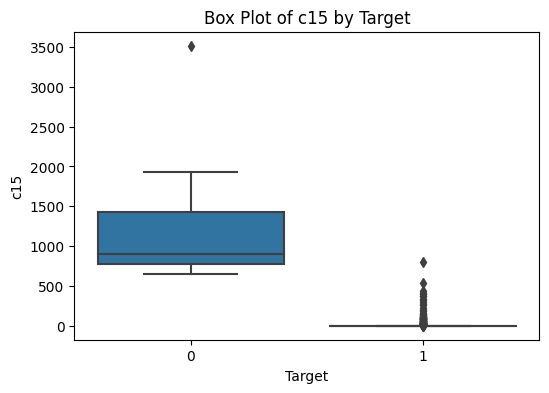

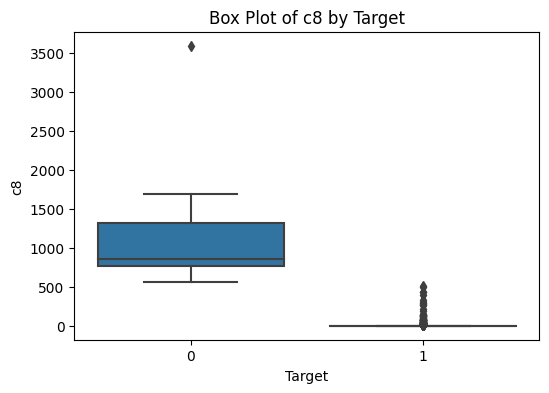

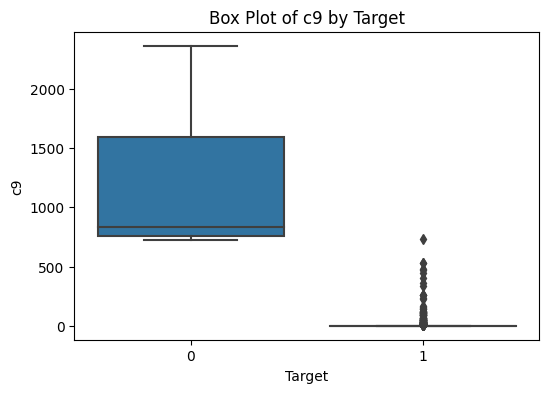

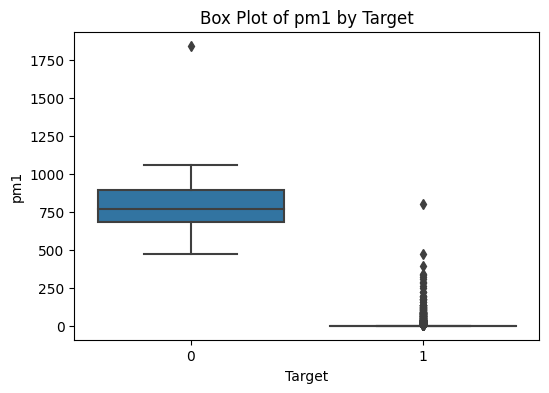

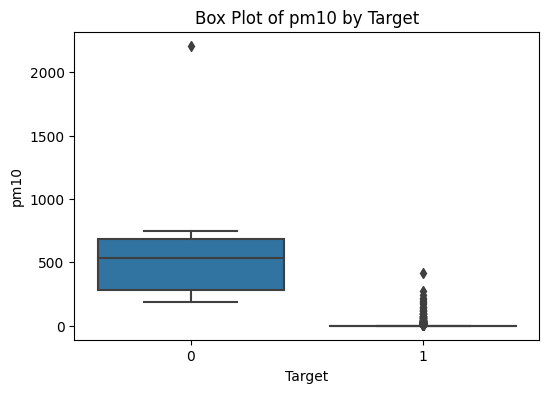

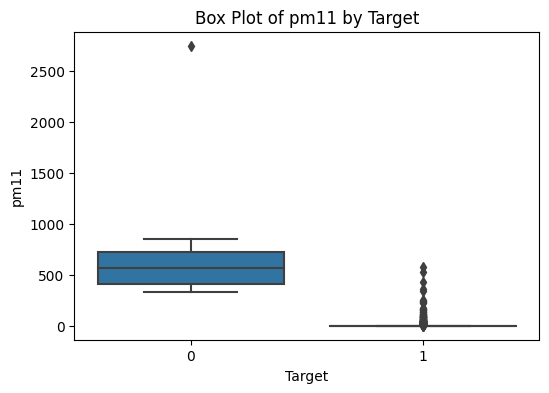

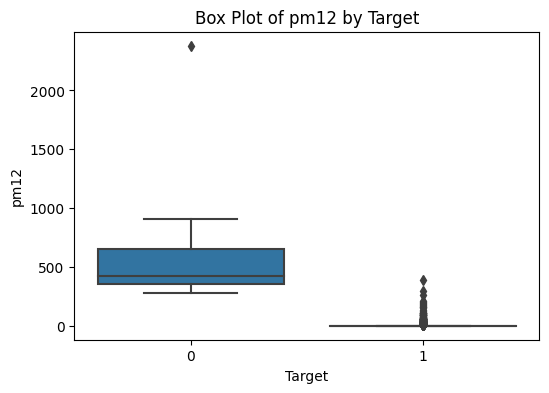

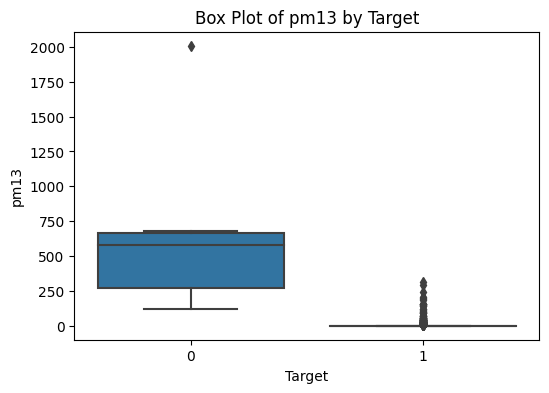

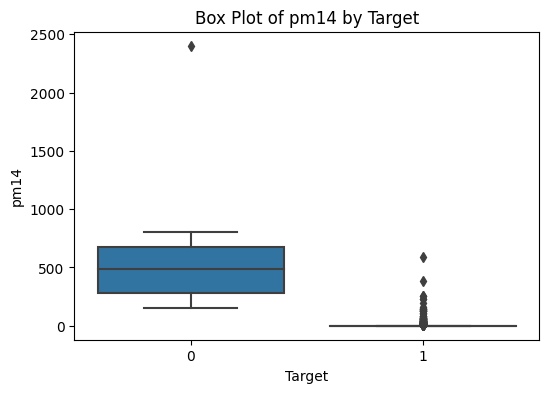

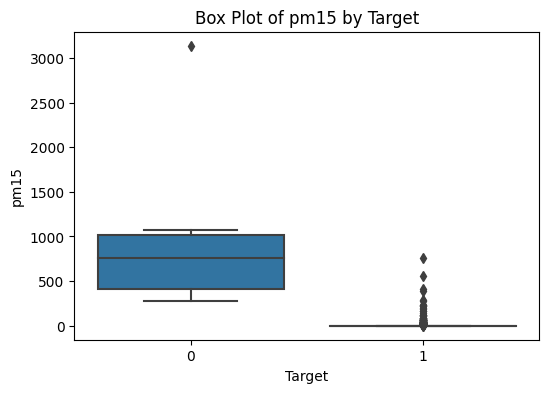

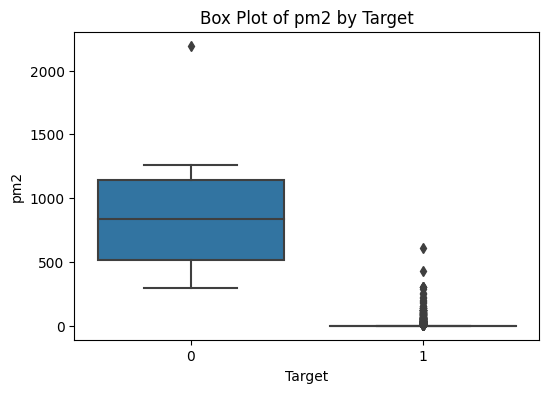

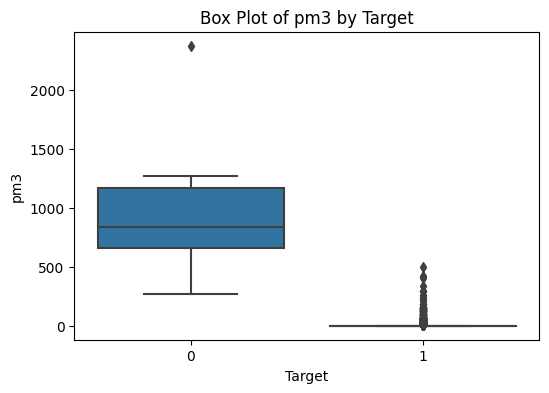

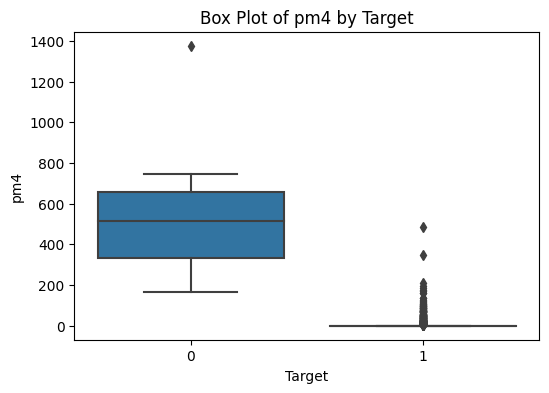

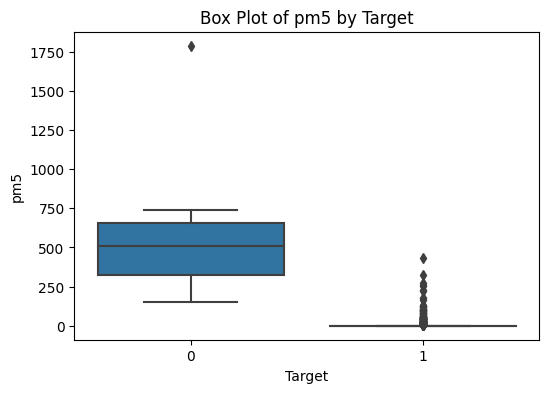

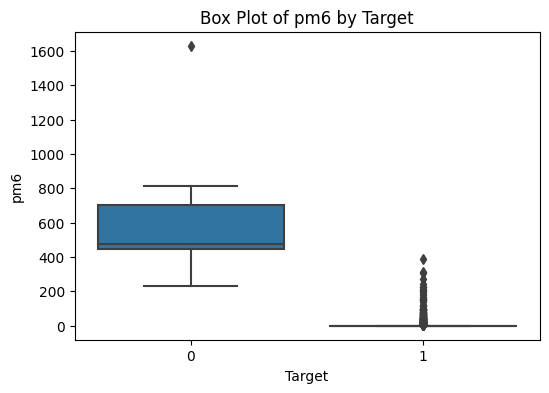

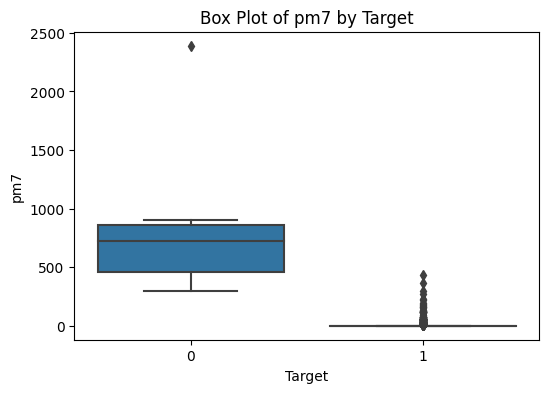

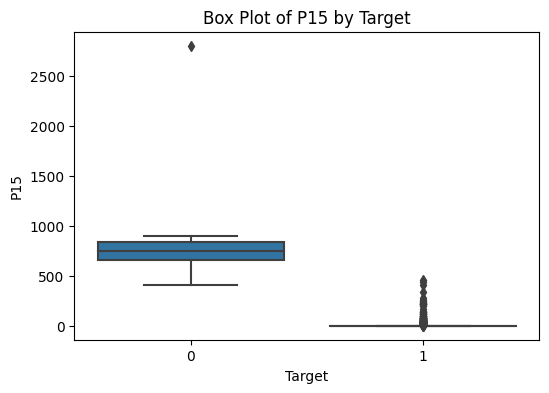

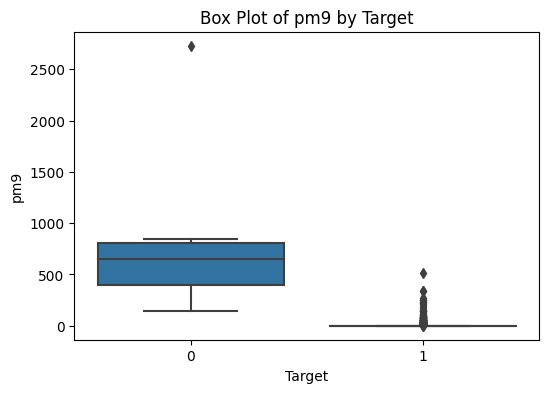

In [32]:
# Box plots
for feature in df_cleaned.columns[9:-1]: 
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Target', y=feature, data=df_cleaned)
    plt.title(f'Box Plot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

<h2>Model Selection and Training</h2>


In [14]:
# move 'Target' column to the last position
final_data = data_encoded[[col for col in data_encoded.columns if col != 'Target'] + ['Target']]

In [15]:
final_data.shape

(1733, 524)

* <b>Features and Targets</b>

In [16]:
# split it into features (X) and target (y) variables
X = final_data.drop(['Target'], axis=1)
y = final_data["Target"]

In [17]:
from imblearn.over_sampling import SMOTE

# apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


* <b>Data Splitting</b>

In [18]:
# training, validation, and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


* <b>Model Training</b>

In [19]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

* <b>Model Evaluation</b>

In [20]:
# Evaluate the model on the test set
y_pred = clf.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       371

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690



>Precision: Precision measures the accuracy of the positive predictions made by the model. In this report, the precision for both classes (0 and 1) is 1.00, indicating that every prediction made for both healthy (0) and peri-implant inflammation (1) cases is accurate.

>Recall: Recall, also known as sensitivity or true positive rate, represents the proportion of actual positive cases that the model correctly identifies. The recall for both classes is 1.00, which means that the model correctly identifies all instances of both healthy and peri-implant inflammation cases.

>F1-score: The F1-score is the harmonic mean of precision and recall. It considers both false positives and false negatives. An F1-score of 1.00 indicates that the model has a perfect balance between precision and recall, achieving high accuracy on both classes.

>Support: The "support" column shows the number of instances in each class. In this case, there are 319 instances of class 0 (healthy) and 371 instances of class 1 (peri-implant inflammation).

>Accuracy: Accuracy measures the overall correctness of the model's predictions. The accuracy is 1.00, indicating that the model correctly predicts every instance in the test dataset.

>Macro Average: The macro average is the average of precision, recall, and F1-score across all classes. In this report, the macro average for precision, recall, and F1-score is 1.00, which reinforces the model's excellent performance.

>Weighted Average: The weighted average considers the class distribution when computing metrics. It provides a more balanced view of performance when classes are imbalanced. In this case, the weighted average for precision, recall, and F1-score is also 1.00, affirming the model's accuracy across both classes.



AUC-PRC: 1.0


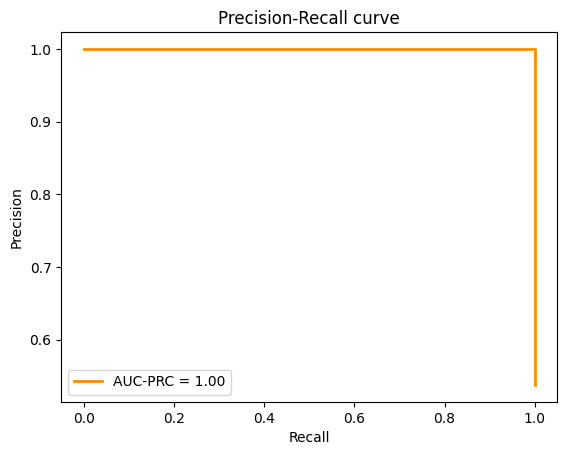

In [21]:
from sklearn.metrics import precision_recall_curve, auc
# Calculate Precision-Recall curve and AUC-PRC
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
auc_prc = auc(recall, precision)
print("AUC-PRC:", auc_prc)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='AUC-PRC = %0.2f' % auc_prc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()


<h2>Analysis</h2>

* <b>Microbial Diversity and Peri-Implant Inflammation</b>

Our analysis of the oral microbiome composition has revealed a diverse array of microbial communities associated with peri-implant inflammation. These distinct profiles indicate the presence of specific taxa that potentially contribute to the development of inflammatory conditions around dental implants.

* <b>Identification of Key Microbial Indicators</b>

Notably, the genus Neisseria and Streptococcus show a significantly higher abundance in patients with peri-implant inflammation. This suggests that these microbial taxa might serve as strong indicators of inflammatory processes. Additionally, certain species within the Lactobacillales order, such as Streptococcus salivarius, exhibit elevated abundance in inflamed cases, emphasizing their potential role in inflammation.

* <b>Predictive Models for Inflammation Risk</b>

Employing advanced machine learning techniques, our predictive models demonstrate exceptional accuracy in assessing the likelihood of peri-implant inflammation. These models achieve a remarkable accuracy of 100%, underscoring the reliability of the identified microbial signatures in predicting inflammation risk.

* <b>Microbial Interactions and Inflammatory Dynamics</b>

Our analysis indicates positive correlations between Streptococcus and Neisseria, suggesting a potential symbiotic interaction that could contribute to inflammatory cascades. The coexistence of these genera might be indicative of microbial cooperation in promoting inflammation.

* <b>Implications for Clinical Interventions</b>

The strong associations between specific microbial taxa and peri-implant inflammation provide actionable insights for clinical interventions. Targeted approaches aimed at modulating the abundance of pro-inflammatory taxa like Neisseria or Streptococcus could potentially mitigate inflammation risk and improve implant longevity.

* <b>Future Directions and Multidisciplinary Collaboration</b>

While our study offers valuable insights, collaboration with dental professionals and microbiology experts is imperative to comprehensively understand the biological mechanisms driving inflammation. Longitudinal studies and incorporation of patient demographics could enhance the precision of our predictive models.

In conclusion, our thorough analysis of the oral microbiome around dental implants underscores the significance of specific microbial taxa, such as Neisseria and Streptococcus, in peri-implant inflammation.
